Ridge regression adds a regularization term as a penalty to the regression loss function to prevent overfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3], [7.8], [8.9], [5.2],
                    [4.59], [2.1], [8], [5], [7.5], [5], [4], [8], [5.2],
                    [4.9], [3], [4.7], [4], [4.8], [3.5], [2.1], [4.1]],
                   dtype=np.float32)

y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4], [3.3], [2.6], [1.96],
                    [3.13], [1.76], [3.2], [2.1], [1.6], [2.5], [2.2], [2.75],
                    [2.4], [1.8], [1], [2], [1.6], [2.4], [2.6], [1.5], [3.1]],
                   dtype=np.float32)

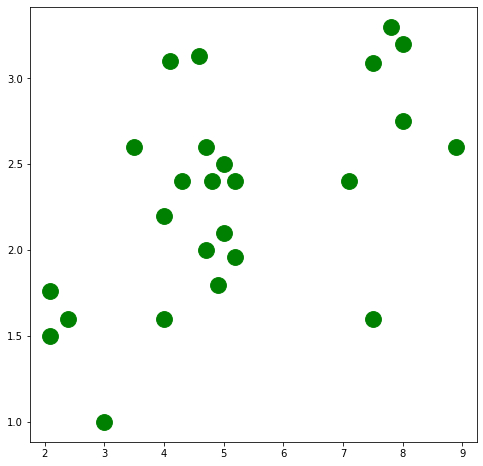

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original Data')
plt.show()

In [4]:
import torch

In [5]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [6]:
input_size = 1
hidden_size = 1
output_size = 1
learning_rate = 0.001

In [7]:
w1 = torch.rand(input_size, hidden_size, requires_grad=True)
w1.shape

torch.Size([1, 1])

In [8]:
b1 = torch.rand(hidden_size, output_size, requires_grad=True)
b1.shape

torch.Size([1, 1])

In [9]:
w1

tensor([[0.6684]], requires_grad=True)

In [10]:
b1

tensor([[0.0919]], requires_grad=True)

In [11]:
# strength of the regularization - larger values imply strong regularization i.e. larger penalties
alpha = 0.8

In [12]:
for iter in range(1, 5001):
    y_pred = X_train.mm(w1).add(b1)
    ridge_regularization_penalty = (w1 * w1)
    loss = ((y_pred - Y_train).pow(2).sum()) + (alpha +
                                                ridge_regularization_penalty)

    if iter % 500 == 0:
        print(iter, loss.item())

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w1.grad.zero_()
        b1.grad.zero_()

500 6.964991092681885
1000 6.950252532958984
1500 6.950214385986328
2000 6.950213432312012
2500 6.950213432312012
3000 6.950213432312012
3500 6.950213432312012
4000 6.950213432312012
4500 6.950213432312012
5000 6.950213432312012


In [13]:
print('w1: ', w1)
print('b1: ', b1)

w1:  tensor([[0.1732]], requires_grad=True)
b1:  tensor([[1.4143]], requires_grad=True)


In [14]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[4.7000],
        [2.4000],
        [7.5000],
        [7.1000],
        [4.3000],
        [7.8000],
        [8.9000],
        [5.2000],
        [4.5900],
        [2.1000],
        [8.0000],
        [5.0000],
        [7.5000],
        [5.0000],
        [4.0000],
        [8.0000],
        [5.2000],
        [4.9000],
        [3.0000],
        [4.7000],
        [4.0000],
        [4.8000],
        [3.5000],
        [2.1000],
        [4.1000]])

In [17]:
predicted_in_tensor = x_train_tensor.mm(w1).add(b1)
predicted_in_tensor

tensor([[2.2282],
        [1.8299],
        [2.7130],
        [2.6438],
        [2.1589],
        [2.7650],
        [2.9555],
        [2.3148],
        [2.2091],
        [1.7779],
        [2.7996],
        [2.2801],
        [2.7130],
        [2.2801],
        [2.1069],
        [2.7996],
        [2.3148],
        [2.2628],
        [1.9338],
        [2.2282],
        [2.1069],
        [2.2455],
        [2.0204],
        [1.7779],
        [2.1243]], grad_fn=<AddBackward0>)

In [18]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.228165 ],
       [1.8298681],
       [2.713048 ],
       [2.6437788],
       [2.158896 ],
       [2.7649999],
       [2.9554894],
       [2.3147511],
       [2.209116 ],
       [1.7779162],
       [2.7996342],
       [2.2801166],
       [2.713048 ],
       [2.2801166],
       [2.106944 ],
       [2.7996342],
       [2.3147511],
       [2.2627993],
       [1.9337716],
       [2.228165 ],
       [2.106944 ],
       [2.2454822],
       [2.0203578],
       [1.7779162],
       [2.1242614]], dtype=float32)

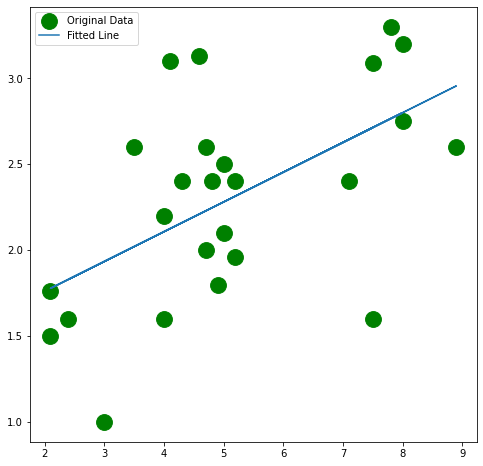

In [19]:
plt.figure(figsize=(8, 8))

plt.scatter(x_train, y_train, c='green', s=250, label='Original Data')
plt.plot(x_train, predicted, label = 'Fitted Line')
plt.legend()
plt.show()

In [20]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()

In [21]:
ridge_reg = ridge_model.fit(x_train, y_train)

In [22]:
print('w1 with sklearn is: ', ridge_model.coef_)

w1 with sklearn is:  [[0.17317088]]


In [23]:
print('b1 with sklearn is: ', ridge_model.intercept_)

b1 with sklearn is:  [1.4142637]
